In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
%matplotlib inline

from IPython.display import Image 
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Getting the data
adlt = pd.read_csv('adult.csv')

In [ ]:
#Exploring the dataset
adlt.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
#Pre-processing
pre = preprocessing.LabelEncoder()

In [ ]:
adlt['workclass'] = pre.fit_transform(adlt['workclass'])
adlt['occupation'] = pre.fit_transform(adlt['occupation'])
adlt['relationship'] = pre.fit_transform(adlt['relationship'])
adlt['race'] = pre.fit_transform(adlt['race'])
adlt['sex'] = pre.fit_transform(adlt['sex'])
adlt['income'] = pre.fit_transform(adlt['income'])

In [ ]:
#Excluding unnecessary columns
adlt.drop(['fnlwgt', 'education', 'marital.status', 'native.country'], axis=1, inplace=True)

In [ ]:
#Most frequent value ​​in Occupation
occupation_count = adlt['occupation'].value_counts().idxmax()
occupation_count

10

In [ ]:
#Most frequent value ​​in workclass
workclass_count = adlt['workclass'].value_counts().idxmax()
workclass_count

4

In [ ]:
#Replacing 0 (Missing Values) for 10 (Most frequent value) in occupation.
def occu(pati):
  on = pati[0]
  if on == 0:
    return 10
  else:
    return on

adlt['occupation'] = adlt[['occupation']].apply(occu,axis=1)

In [ ]:
#Replacing 0 (Missing Values) for 4 (Most frequent value) in workclass.
def wor(kcl):
  ass = kcl[0]
  if ass == 0:
    return 4
  else:
    return ass

adlt['workclass'] = adlt[['workclass']].apply(wor,axis=1)

In [ ]:
#Rename columns
adlt.columns = adlt.columns.str.replace('.', '_')
adlt = adlt.rename(columns = {'education_num': 'education'}, inplace = False)

In [ ]:
adlt.head()

,age,workclass,education,occupation,relationship,race,sex,hours_per_week,income
0,90,4,9,10,1,4,0,40,0
1,82,4,9,4,1,4,0,18,0
2,66,4,10,10,4,2,0,40,0
3,54,4,4,7,4,4,0,40,0
4,41,4,10,10,3,4,0,40,0


In [ ]:
adlt.describe(include='all')

,age,workclass,education,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,4.094438,10.080679,7.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.107194,2.572720,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,10.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,12.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,16.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
#Model
X_train, X_test, y_train, y_test = train_test_split(adlt.drop('income',axis=1), adlt['income'], test_size=0.30, random_state=100)

In [ ]:
dectree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=250, min_samples_leaf=250, max_depth=8)
dectree = dectree.fit(X_train, y_train)

In [ ]:
#Prediction
treepred = dectree.predict(X_test) 
treepred

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
#Picture of the Decision Tree 
dot_data = tree.export_graphviz(dectree, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_train), class_names=['<50k', '>50k'],
                               filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph

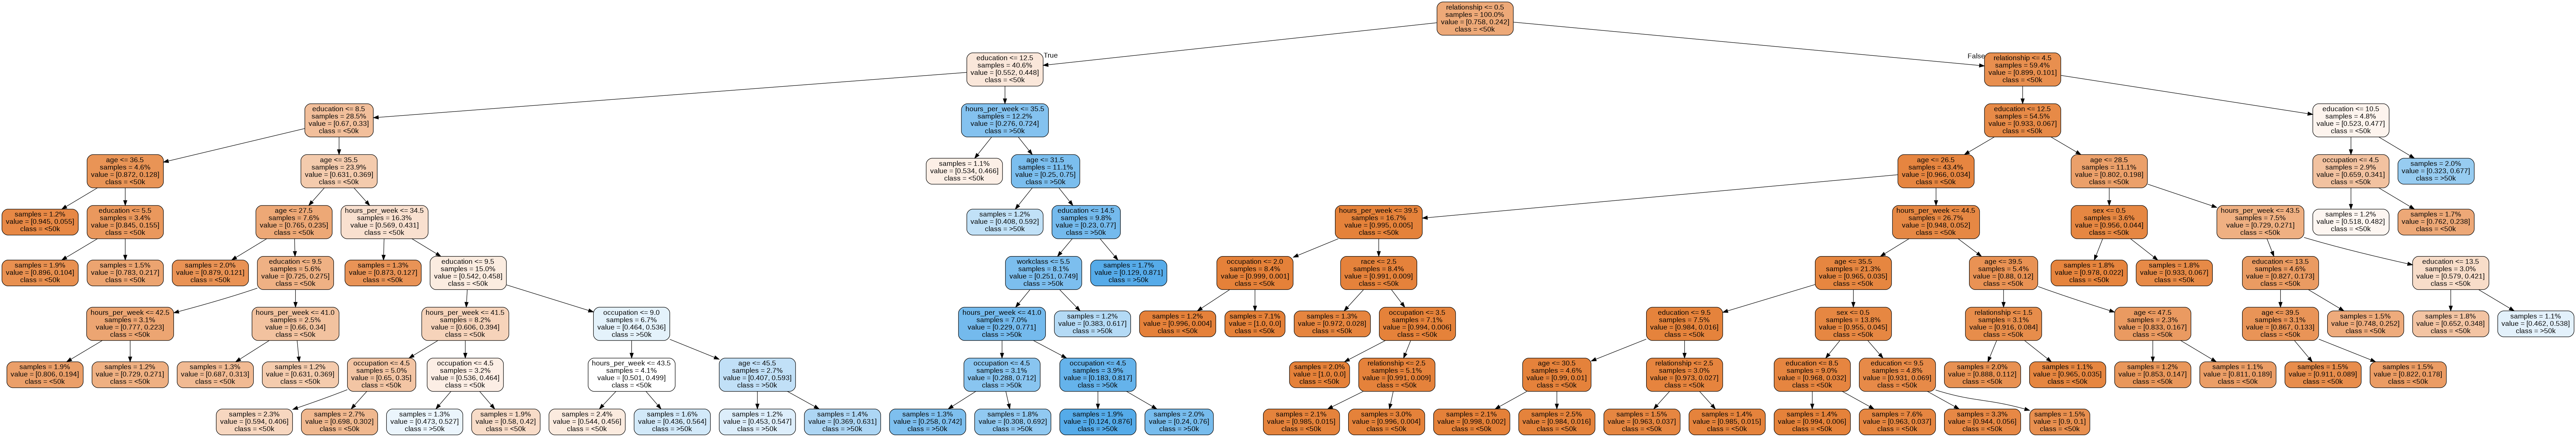

In [ ]:
Image(graph.create_png())

In [ ]:
#Evaluate
prectree = str(round(dectree.score(X_test,y_test) * 100, 2))+"%" #Medindo a preciso do modelo
print("A acurácia do modelo Árvore de Decisões foi", prectree)

A acurácia do modelo Árvore de Decisões foi 82.78%


In [ ]:
#Confusion Matrix
print("\nConfusion Matrix:\n",
pd.crosstab(y_test, treepred, rownames=['Real'], colnames=['Predito'],
margins=True, margins_name='Todos'))


Confusion Matrix:
 Predito     0  Todos
Real                
0        7441   7441
1        2328   2328
Todos    9769   9769


In [ ]:
#Classification Report
print(classification_report(y_test, treepred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7441
           1       0.00      0.00      0.00      2328

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
